In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-sales-data/car_prices.csv


In [2]:
import pandas as pd
df=pd.read_csv("/kaggle/input/vehicle-sales-data/car_prices.csv")
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [3]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [4]:
df=df.dropna().reset_index(drop=True).sort_index().copy()

In [5]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [6]:
duplicate=df[df.duplicated()]
duplicate

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [7]:
df.drop_duplicates(subset=['make'])

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
12,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0hdxfr145753,ca,2.0,5559.0,white,beige,enterprise vehicle exchange / tra / rental / t...,15350.0,12000.0,Tue Jan 13 2015 12:00:00 GMT-0800 (PST)
34,2014,Cadillac,ELR,Base,Coupe,automatic,1g6rr1e48eu601450,ca,47.0,4436.0,gray,black,rogue cu,49400.0,44000.0,Wed Feb 04 2015 04:30:00 GMT-0800 (PST)
40,2014,Acura,ILX,Technology Package,Sedan,automatic,19vde1f70ee008913,ca,25.0,9051.0,gray,black,american honda motor company,22700.0,21250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
48,2015,Lexus,RX 350,Base,SUV,automatic,2t2zk1ba7fc155782,ca,43.0,7770.0,white,black,lexus financial services,41200.0,38400.0,Tue Dec 30 2014 00:00:00 GMT-0800 (PST)


In [8]:
df=df.drop('saledate',axis=1).copy()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0


In [9]:
df.select_dtypes(include=['object','bool'])

,make,model,trim,body,transmission,vin,state,color,interior,seller
0,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,white,black,kia motors america inc
1,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,white,beige,kia motors america inc
2,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,gray,black,financial services remarketing (lease)
3,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,white,black,volvo na rep/world omni
4,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,gray,black,financial services remarketing (lease)
...,...,...,...,...,...,...,...,...,...,...
472320,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,white,brown,lauderdale imports ltd bmw pembrok pines
472321,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,white,black,i -5 uhlmann rv
472322,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,black,black,financial services remarketing (lease)
472323,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,white,black,enterprise vehicle exchange / tra / rental / t...


In [10]:
import numpy as np
df.apply(np.max)

year                         2015
make                        smart
model                          xD
trim                    xDrive50i
body                      xtracab
transmission               manual
vin             zhwgu22t97la05738
state                          wi
condition                    49.0
odometer                 999999.0
color                           —
interior                        —
seller             zygi auto corp
mmr                      182000.0
sellingprice             230000.0
dtype: object

In [11]:
df[df['make']=='Audi']['sellingprice'].max()


120000.0

In [12]:
req=['mmr','sellingprice']
df.groupby(['make'])[req].describe()

mmr                                                    \
                 count           mean           std       min        25%   
make                                                                       
Acura           4503.0   13104.569176   8817.425772      50.0    5412.50   
Aston Martin      24.0   54075.000000  13107.589902   39300.0   46850.00   
Audi            4802.0   20183.381924  14968.343862     400.0    7806.25   
BMW            17509.0   21407.958764  14412.432954      50.0    9125.00   
Bentley          105.0   74077.142857  31570.410493   35400.0   51300.00   
Buick           4470.0   10765.268456   7956.921565      25.0    3675.00   
Cadillac        6315.0   14853.452098  11889.612725      50.0    5125.00   
Chevrolet      54150.0   12022.966759   8649.177494      25.0    5950.00   
Chrysler       15133.0   10866.440891   6647.702149      25.0    5050.00   
Daewoo             2.0     487.500000     17.677670     475.0     481.25   
Dodge          27181.0   11157.709429   6272.570906      25.0    6625.00   
FIAT             725.0   10092.413793   2140.421221    5500.0    8350.00   
Ferrari           17.0  130823.529412  23521.892181   80000.0  121000.00   
Fisker             9.0   49100.000000   3054.914074   45600.0   47300.00   
Ford           81013.0   15007.599398   8310.994120      25.0    9425.00   
GMC             9217.0   16840.596181  10042.175367     125.0    9100.00   
Geo               16.0     598.437500    186.294737     275.0     500.00   
HUMMER           768.0   15125.618490   5960.759238    5850.0   11100.00   
Honda          24781.0   10991.580243   6528.607082      25.0    5650.00   
Hyundai        18659.0   11255.091377   5308.529834      50.0    9025.00   
Infiniti       14011.0   20649.691314   7675.034052     175.0   18000.00   
Isuzu            179.0    1808.100559   1280.201451     300.0     925.00   
Jaguar          1257.0   19833.194113  19141.591937      50.0    3300.00   
Jeep           12735.0   14885.834315   9121.415473      50.0    7025.00   
Kia            15828.0   11904.345148   5303.830827      25.0    9050.00   
Lamborghini        3.0  113666.666667   5507.570547  110000.0  110500.00   
Land Rover      1322.0   33570.537065  20949.330791     450.0   19350.00   
Lexus          10409.0   20371.123547  10930.950729      50.0   11000.00   
Lincoln         4926.0   17730.064961   9863.369214      25.0    9593.75   
Lotus              1.0   40300.000000           NaN   40300.0   40300.00   
MINI            2946.0   12460.132383   5530.267083    1750.0    7875.00   
Maserati         109.0   44708.715596  23438.946345    6200.0   24100.00   
Mazda           6930.0   10334.264069   5889.986133      50.0    6225.00   
Mercedes-Benz  14008.0   21632.174472  14610.298553      50.0   11600.00   
Mercury         1571.0    4145.114577   2925.415277      50.0    1750.00   
Mitsubishi      3661.0    8151.201857   5758.052148      75.0    3375.00   
Nissan         44043.0   11856.737166   5566.330226      25.0    8850.00   
Oldsmobile       318.0    1106.682390    579.231583      25.0     725.00   
Plymouth          16.0   13812.500000  12313.627275     325.0     562.50   
Pontiac         4018.0    4009.625436   2555.554003      50.0    2175.00   
Porsche         1157.0   39143.280035  24921.508631    1775.0   15850.00   
Ram             4044.0   25495.876607   8555.661450    1950.0   19987.50   
Rolls-Royce       16.0  154812.500000  10527.543240  141000.0  147500.00   
Saab             416.0    3739.723558   2527.360733      25.0    1850.00   
Saturn          2570.0    3563.725681   2480.833022      25.0    1525.00   
Scion           1545.0    9808.349515   4478.090178    1050.0    5950.00   
Subaru          4369.0   15669.283589   7423.051987     225.0   10000.00   
Suzuki           977.0    3985.363357   2639.238695     225.0    1775.00   
Tesla             23.0   67813.043478   9481.719462   54600.0   59600.00   
Toyota         35313.0   12529.356045   6664.609007      50.0    77

In [13]:
df['profit']=df['sellingprice']-df['mmr']
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,profit
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,1000.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,700.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,-1900.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,250.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,2500.0
472321,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,600.0
472322,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,4200.0
472323,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,-4000.0


In [14]:
df['make'].value_counts()

make
Ford             81013
Chevrolet        54150
Nissan           44043
Toyota           35313
Dodge            27181
Honda            24781
Hyundai          18659
BMW              17509
Kia              15828
Chrysler         15133
Infiniti         14011
Mercedes-Benz    14008
Jeep             12735
Volkswagen       10780
Lexus            10409
GMC               9217
Mazda             6930
Cadillac          6315
Lincoln           4926
Audi              4802
Acura             4503
Buick             4470
Subaru            4369
Ram               4044
Pontiac           4018
Mitsubishi        3661
Volvo             3082
MINI              2946
Saturn            2570
Mercury           1571
Scion             1545
Land Rover        1322
Jaguar            1257
Porsche           1157
Suzuki             977
HUMMER             768
FIAT               725
Saab               416
smart              343
Oldsmobile         318
Isuzu              179
Maserati           109
Bentley            105
Aston 

In [15]:
df1=df.query('year>1990 & year<1995')
df2=df.query('year>1995 & year<2000')
df3=df.query('year>2000 & year<2005')
df4=df.query('year>2005 & year<2010')
df5=df.query('year>2010 & year<=2015')

In [16]:
df1['make'].value_counts()

make
Toyota           115
Honda            111
Ford              62
Mercedes-Benz     35
Lexus             33
Chevrolet         25
Cadillac          22
Buick             21
Mazda             17
Mercury           15
Jeep              13
BMW               12
Nissan            12
Acura             11
Lincoln           11
Oldsmobile        10
Saturn             8
Pontiac            6
Volvo              6
Isuzu              3
Geo                3
Chrysler           3
Infiniti           3
GMC                2
Mitsubishi         1
Dodge              1
Name: count, dtype: int64

In [17]:
df2['make'].value_counts()

make
Honda            770
Toyota           646
Ford             643
Chevrolet        425
Nissan           270
Lexus            254
BMW              228
Mercedes-Benz    208
Buick            147
Cadillac         144
Pontiac          136
Volkswagen       118
Saturn           117
Acura            115
Mercury          112
Volvo            106
Jeep              94
Dodge             91
Lincoln           84
Chrysler          78
Oldsmobile        75
Mazda             61
GMC               57
Subaru            53
Mitsubishi        42
Audi              40
Infiniti          35
Isuzu             32
Jaguar            24
Porsche           21
Saab              21
Land Rover        16
Geo               12
Plymouth           8
Suzuki             6
Kia                5
Hyundai            1
Name: count, dtype: int64

In [18]:
df3['make'].value_counts()

make
Ford             4327
Chevrolet        4294
Honda            2952
Toyota           2516
Nissan           2197
BMW              1726
Dodge            1525
Mercedes-Benz    1363
Lexus            1249
Volkswagen       1172
GMC              1132
Jeep             1065
Cadillac          880
Acura             860
Pontiac           810
Chrysler          780
Hyundai           778
Infiniti          688
Saturn            683
Volvo             667
Buick             601
Mazda             597
Mitsubishi        594
Audi              543
Lincoln           463
Kia               387
Mercury           384
Jaguar            321
Subaru            280
Oldsmobile        200
Porsche           146
HUMMER            132
MINI              129
Saab              126
Suzuki             89
Isuzu              83
Land Rover         57
Scion              16
Maserati            5
Bentley             3
Daewoo              2
Plymouth            2
Ferrari             1
Name: count, dtype: int64

In [19]:
df4['make'].value_counts()

make
Chevrolet        12534
Ford             10191
Toyota            6432
Dodge             6381
Nissan            5242
Honda             5163
BMW               4775
Chrysler          4044
Mercedes-Benz     3575
Jeep              3339
GMC               2699
Pontiac           2558
Cadillac          2291
Volkswagen        2227
Hyundai           2201
Lexus             2190
Kia               1677
Saturn            1512
Audi              1352
Infiniti          1178
Buick             1177
Acura             1143
Mazda              976
Mitsubishi         859
Lincoln            777
MINI               686
Volvo              667
Mercury            657
Subaru             645
HUMMER             555
Suzuki             541
Scion              474
Land Rover         326
Porsche            277
Jaguar             230
Saab               189
smart               71
Bentley             58
Maserati            54
Isuzu               28
Aston Martin        22
Lamborghini          3
Ferrari              2
Lotus 

In [20]:
df5['make'].value_counts()

make
Ford             59869
Nissan           33372
Chevrolet        30674
Toyota           22139
Dodge            15401
Hyundai          14527
Honda            13111
Kia              12834
Infiniti         11676
BMW               9471
Chrysler          8578
Mercedes-Benz     7388
Jeep              6766
Volkswagen        6282
Lexus             5881
Mazda             4415
GMC               4165
Ram               4044
Lincoln           3206
Subaru            3046
Audi              2393
Cadillac          2071
MINI              1872
Buick             1849
Mitsubishi        1836
Acura             1760
Volvo             1153
Scion              906
Land Rover         783
FIAT               725
Porsche            605
Jaguar             499
smart              266
Suzuki             214
Maserati            42
Mercury             28
Bentley             24
Tesla               23
Rolls-Royce         13
Saab                11
Fisker               9
Ferrari              8
Aston Martin         2
Name: 

In [21]:
df=df.sort_values('year', ascending=True).reset_index(drop=True).sort_index().copy()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,profit
0,1990,Honda,Accord,EX,Sedan,automatic,jhmcb7665lc099475,az,1.0,247555.0,gray,gray,cash time title loans,675.0,400.0,-275.0
1,1990,Toyota,Corolla,Base,Sedan,automatic,jt2ae91a0l3295341,or,2.0,195851.0,red,gray,purple heart services inc,475.0,200.0,-275.0
2,1990,Chevrolet,Corvette,Base,hatchback,automatic,1g1yy2385l5101074,mo,2.0,108639.0,green,tan,tdaf remarketing,3875.0,4100.0,225.0
3,1990,Honda,Accord,EX,Sedan,automatic,jhmcb7661lc036504,tx,2.0,19279.0,gray,tan,automotive remarketing inc,875.0,350.0,-525.0
4,1990,Toyota,Camry,Deluxe,Sedan,automatic,jt2sv21exl0345999,wa,2.0,214723.0,blue,blue,donate for charity,675.0,375.0,-300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472320,2015,Hyundai,Sonata Hybrid,Limited,Sedan,automatic,kmhec4a46fa132930,fl,5.0,611.0,white,beige,hyundai motor america/co car,25400.0,28800.0,3400.0
472321,2015,Hyundai,Santa Fe Sport,Sport,SUV,automatic,5xyztdlbxfg234278,il,5.0,15357.0,white,gray,ec sales llc,21400.0,21600.0,200.0
472322,2015,Hyundai,Genesis,3.8,Sedan,automatic,kmhgn4je4fu042878,fl,49.0,10575.0,white,black,hyundai motor america/co car,36200.0,40200.0,4000.0
472323,2015,Hyundai,Santa Fe Sport,Sport,SUV,automatic,5xyztdlb8fg234473,il,47.0,16884.0,white,gray,ec sales llc,21700.0,21700.0,0.0


In [22]:
df.query('mmr<sellingprice')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,profit
2,1990,Chevrolet,Corvette,Base,hatchback,automatic,1g1yy2385l5101074,mo,2.0,108639.0,green,tan,tdaf remarketing,3875.0,4100.0,225.0
9,1990,Chevrolet,C/K 1500 Series,454SS,Regular Cab,automatic,1gcdc14n5lz242061,tn,4.0,34266.0,black,red,t & s motors,9550.0,11500.0,1950.0
13,1990,Lexus,LS 400,Base,Sedan,automatic,jt8uf11e5l0041243,ca,3.0,106472.0,white,tan,illest motors,550.0,700.0,150.0
14,1990,Chevrolet,C/K 1500 Series,454SS,Regular Cab,automatic,1gcdc14n4lz157583,fl,3.0,101927.0,black,red,american bank auto liquidators,7225.0,8000.0,775.0
16,1990,Mazda,MX-5 Miata,Base,Convertible,manual,jm1na3512l0109926,ca,2.0,70370.0,blue,gray,aaero sweet corporation,2075.0,2500.0,425.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472318,2015,Hyundai,Sonata Hybrid,Limited,Sedan,automatic,kmhec4a4xfa132879,fl,49.0,1238.0,red,beige,hyundai motor america/co car,25200.0,28400.0,3200.0
472320,2015,Hyundai,Sonata Hybrid,Limited,Sedan,automatic,kmhec4a46fa132930,fl,5.0,611.0,white,beige,hyundai motor america/co car,25400.0,28800.0,3400.0
472321,2015,Hyundai,Santa Fe Sport,Sport,SUV,automatic,5xyztdlbxfg234278,il,5.0,15357.0,white,gray,ec sales llc,21400.0,21600.0,200.0
472322,2015,Hyundai,Genesis,3.8,Sedan,automatic,kmhgn4je4fu042878,fl,49.0,10575.0,white,black,hyundai motor america/co car,36200.0,40200.0,4000.0


In [23]:
bmw_info=df.query("make=='BMW' ").reset_index(drop=True).sort_index()
bmw_info

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,profit
0,1991,BMW,8 Series,850i,Coupe,automatic,wbaeg231xmcb73952,ca,2.0,106148.0,white,gray,rover of orange,7600.0,6750.0,-850.0
1,1992,BMW,5 Series,525i,Sedan,automatic,wbahd6318nbj69772,pa,3.0,1.0,gold,beige,purple heart,800.0,450.0,-350.0
2,1994,BMW,3 Series,325i,Sedan,manual,wbacb3329rfe18847,oh,2.0,188226.0,green,tan,halleen kia,725.0,950.0,225.0
3,1994,BMW,3 Series,325i,Convertible,automatic,wbabj6325rjd32383,az,2.0,75122.0,blue,gray,pacific funding,1900.0,2200.0,300.0
4,1994,BMW,3 Series,318i,sedan,manual,wbaca5328rfg11800,nm,1.0,21138.0,white,beige,mark cj inc,1625.0,550.0,-1075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,2015,BMW,5 Series,528i,Sedan,automatic,wba5a5c50fd517062,ga,47.0,9421.0,white,—,bmw north america greer,43600.0,52000.0,8400.0
17505,2015,BMW,3 Series,328i xDrive,wagon,automatic,wba3g7c59fk297191,fl,5.0,2828.0,white,beige,bavarian motor cars usa inc,39900.0,38000.0,-1900.0
17506,2015,BMW,X1,sDrive28i,SUV,automatic,wbavm1c54fvw58937,fl,5.0,4841.0,gray,black,onesource/deluca toyota inc,25800.0,27600.0,1800.0
17507,2015,BMW,X3,xDrive28i,SUV,automatic,5uxwx9c52f0d46062,ca,43.0,20061.0,white,black,sixt rent a car llc,31100.0,29800.0,-1300.0


In [24]:
audi_info=df.query("make=='Audi' ").reset_index(drop=True).sort_index()
audi_info

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,profit
0,1996,Audi,A6,2.8 quattro,Sedan,automatic,wauga84a6tn026295,pa,2.0,165647.0,black,gray,purple heart,1000.0,300.0,-700.0
1,1997,Audi,A4,2.8 quattro,Sedan,automatic,wauea88d7va168113,nc,32.0,154968.0,blue,tan,performance chev subaru porsche,1125.0,2200.0,1075.0
2,1997,Audi,A6,2.8 quattro,Sedan,automatic,waugc84a6vn013057,md,2.0,122121.0,black,black,honda of tysons corner,925.0,350.0,-575.0
3,1998,Audi,A4,2.8 quattro,Sedan,automatic,waued28d3wa128391,ca,27.0,120746.0,white,beige,high bid trading co inc,1150.0,1400.0,250.0
4,1998,Audi,A4,2.8 quattro,Sedan,automatic,waued28d0wa102914,ut,19.0,181072.0,red,black,remarketing by ge/america first credit union,925.0,600.0,-325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,2015,Audi,A3,1.8 TFSI Premium,sedan,automatic,wauacgff1f1045643,la,48.0,9229.0,black,black,american auto brokers inc,24800.0,24400.0,-400.0
4798,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff1f1010276,il,46.0,5089.0,black,black,mercedes benz of chicago,23600.0,23500.0,-100.0
4799,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff4f1002866,ca,3.0,5746.0,white,gray,enterprise vehicle exchange / tra / rental / t...,23500.0,21200.0,-2300.0
4800,2015,Audi,A3,1.8 TFSI Premium,Sedan,automatic,wauacgff9f1020795,fl,44.0,5845.0,black,black,prestige motorcar imports inc,23500.0,24200.0,700.0


In [25]:
mercedes_info=df.query("make=='Mercedes-Benz'").reset_index(drop=True).sort_index()
mercedes_info

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,profit
0,1990,Mercedes-Benz,300-Class,300E,Sedan,automatic,wdbea30d6lb200847,nv,2.0,141799.0,white,—,automotive remarketing inc,425.0,300.0,-125.0
1,1990,Mercedes-Benz,300-Class,300E,Sedan,automatic,wdbea30d3lb215497,tx,2.0,117082.0,white,gray,titlemax/austin tx19,950.0,250.0,-700.0
2,1991,Mercedes-Benz,500-Class,500SL,Convertible,automatic,wdbfa66e5mf030237,fl,2.0,117006.0,blue,beige,silva auto sales,2100.0,1600.0,-500.0
3,1991,Mercedes-Benz,300-Class,300SL,Convertible,automatic,wdbfa61e6mf014670,ca,3.0,112018.0,red,gray,magnussens lexus of fremont,2850.0,4100.0,1250.0
4,1991,Mercedes-Benz,300-Class,300E,Sedan,automatic,wdbea30d5mb451344,wa,1.0,166096.0,black,black,volunteers of america western washington,825.0,275.0,-550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14003,2015,Mercedes-Benz,GL-Class,GL450 4MATIC,SUV,automatic,4jgdf6ee1fa467787,ca,4.0,22589.0,white,black,sixt rent a car llc,62000.0,56250.0,-5750.0
14004,2015,Mercedes-Benz,C-Class,C300 Sport 4MATIC,Sedan,automatic,55swf4kb6fu037898,ca,39.0,10491.0,black,black,sixt rent a car llc,36500.0,35750.0,-750.0
14005,2015,Mercedes-Benz,M-Class,ML350 4MATIC,SUV,automatic,4jgda5hb0fa460338,ca,47.0,15065.0,gray,gray,sixt rent a car llc,45200.0,43200.0,-2000.0
14006,2015,Mercedes-Benz,GL-Class,GL450 4MATIC,suv,automatic,4jgdf6ee6fa526154,nv,5.0,7904.0,white,black,mr m auto group,66000.0,60500.0,-5500.0


In [26]:
mercedes_info.describe()

,year,condition,odometer,mmr,sellingprice,profit
count,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000,14008.000000
mean,2009.352870,32.312322,63663.396916,21632.174472,21314.872216,-317.302256
std,4.005126,11.963285,48898.745547,14610.298553,14424.590634,2321.405702
min,1990.000000,1.000000,1.000000,50.000000,1.000000,-87750.000000
25%,2007.000000,27.000000,26320.000000,11600.000000,11250.000000,-1050.000000
50%,2011.000000,36.000000,50119.000000,21200.000000,20750.000000,-150.000000
75%,2012.000000,41.000000,91785.250000,27800.000000,27325.000000,700.000000
max,2015.000000,49.000000,999999.000000,170000.000000,173000.000000,52100.000000


In [27]:
m1=mercedes_info.drop(['make','mmr','sellingprice','model','vin','trim','state'],axis=1).head()
m1

,year,body,transmission,condition,odometer,color,interior,seller,profit
0,1990,Sedan,automatic,2.0,141799.0,white,—,automotive remarketing inc,-125.0
1,1990,Sedan,automatic,2.0,117082.0,white,gray,titlemax/austin tx19,-700.0
2,1991,Convertible,automatic,2.0,117006.0,blue,beige,silva auto sales,-500.0
3,1991,Convertible,automatic,3.0,112018.0,red,gray,magnussens lexus of fremont,1250.0
4,1991,Sedan,automatic,1.0,166096.0,black,black,volunteers of america western washington,-550.0


In [28]:
a1=audi_info.drop(['body','transmission','condition','model','vin','odometer','color'],axis=1).head()
a1

,year,make,trim,state,interior,seller,mmr,sellingprice,profit
0,1996,Audi,2.8 quattro,pa,gray,purple heart,1000.0,300.0,-700.0
1,1997,Audi,2.8 quattro,nc,tan,performance chev subaru porsche,1125.0,2200.0,1075.0
2,1997,Audi,2.8 quattro,md,black,honda of tysons corner,925.0,350.0,-575.0
3,1998,Audi,2.8 quattro,ca,beige,high bid trading co inc,1150.0,1400.0,250.0
4,1998,Audi,2.8 quattro,ut,black,remarketing by ge/america first credit union,925.0,600.0,-325.0


In [29]:
mer=pd.merge(a1,m1,on='year',how='left')
mer

,year,make,trim,state,interior_x,seller_x,mmr,sellingprice,profit_x,body,transmission,condition,odometer,color,interior_y,seller_y,profit_y
0,1996,Audi,2.8 quattro,pa,gray,purple heart,1000.0,300.0,-700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997,Audi,2.8 quattro,nc,tan,performance chev subaru porsche,1125.0,2200.0,1075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997,Audi,2.8 quattro,md,black,honda of tysons corner,925.0,350.0,-575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998,Audi,2.8 quattro,ca,beige,high bid trading co inc,1150.0,1400.0,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,Audi,2.8 quattro,ut,black,remarketing by ge/america first credit union,925.0,600.0,-325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'type')

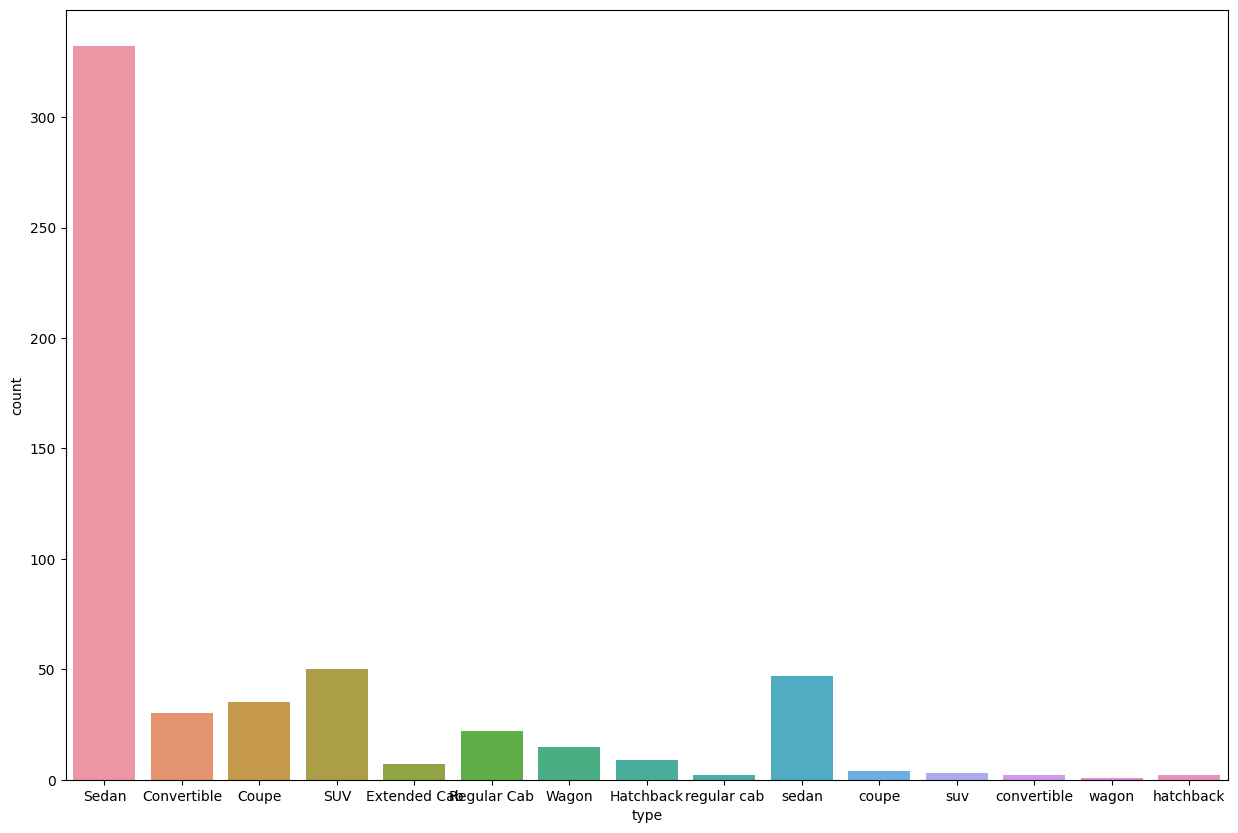

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure (figsize=(15,10))
sns.countplot(x=df1['body'])
plt.xlabel('type')

<Axes: xlabel='body', ylabel='count'>

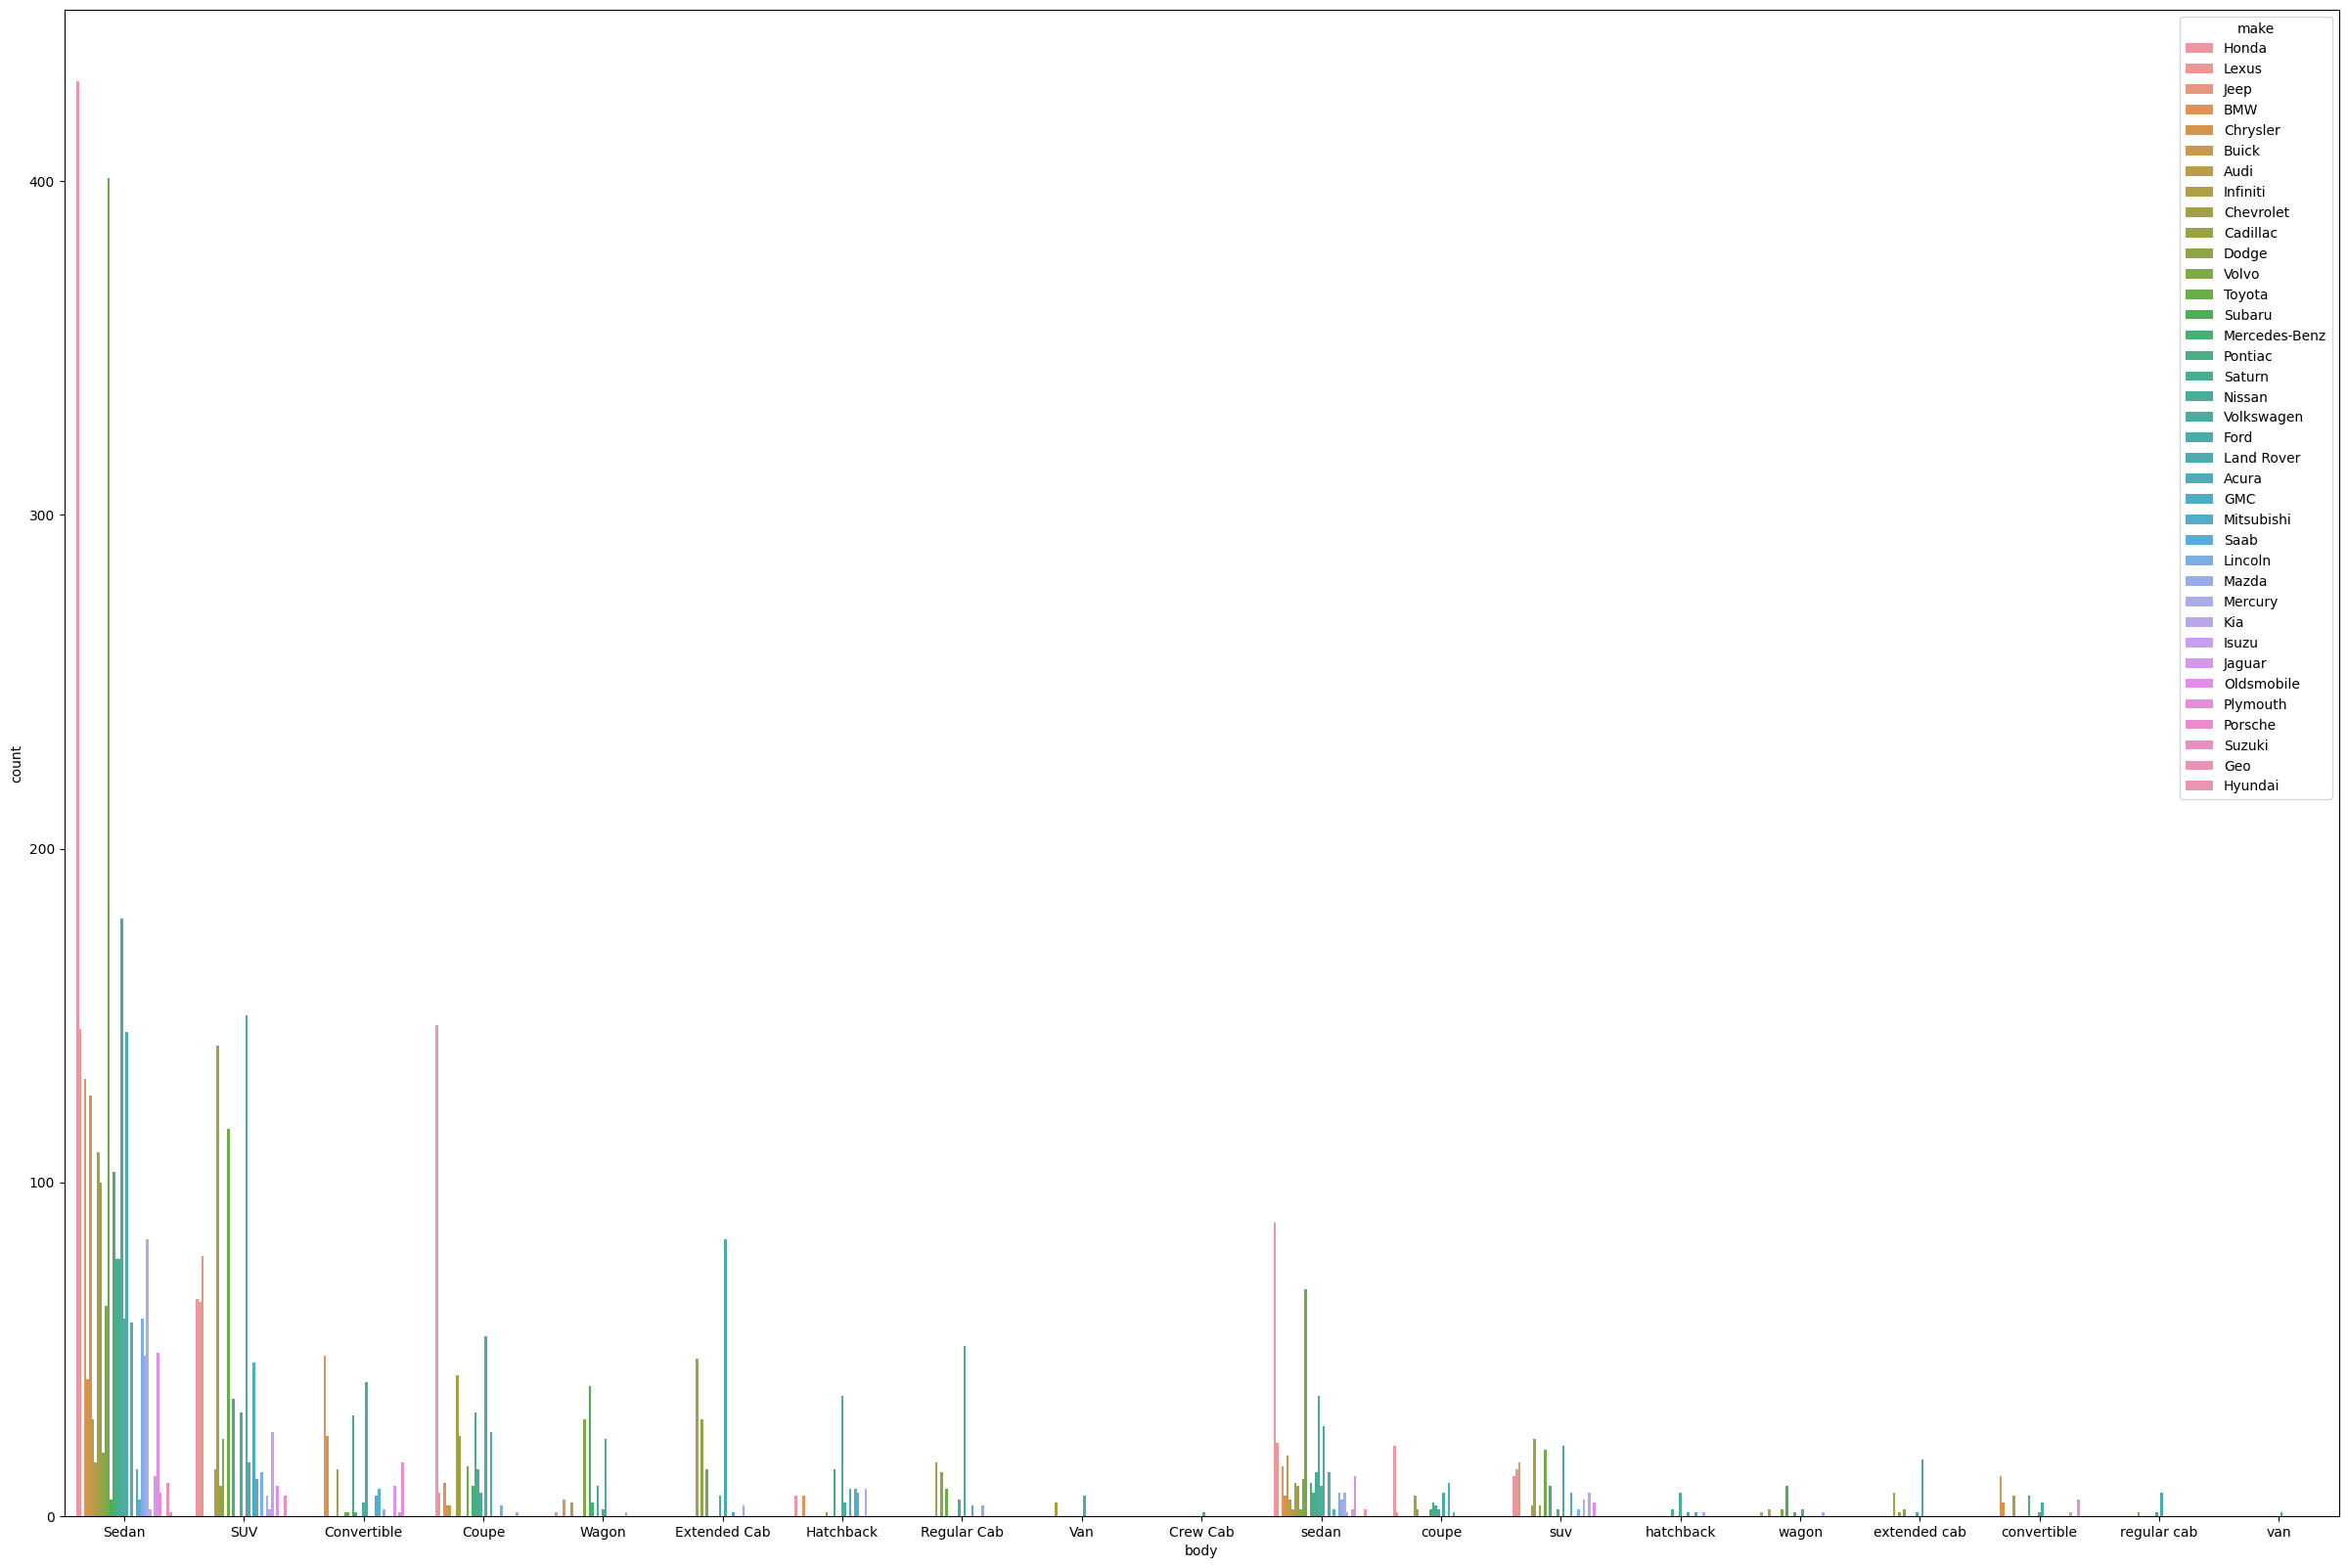

In [31]:
plt.figure (figsize=(30,20))
sns.countplot(x='body',hue='make',data=df2)

<Axes: xlabel='make'>

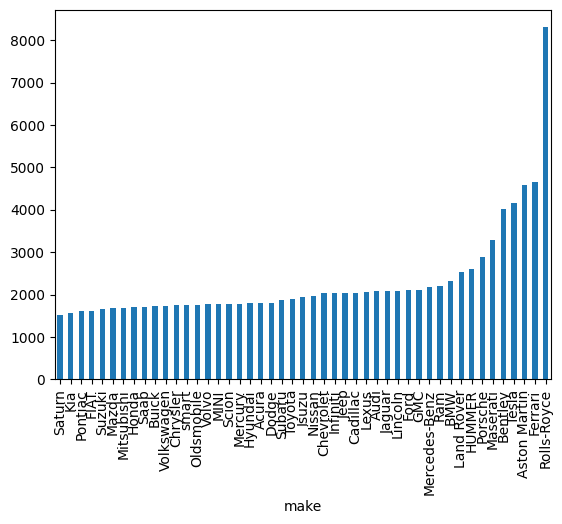

In [32]:
df.query('profit>1000').groupby('make')['profit'].agg(['mean']).sort_values('mean')['mean'].plot(kind='bar')

<Axes: xlabel='body'>

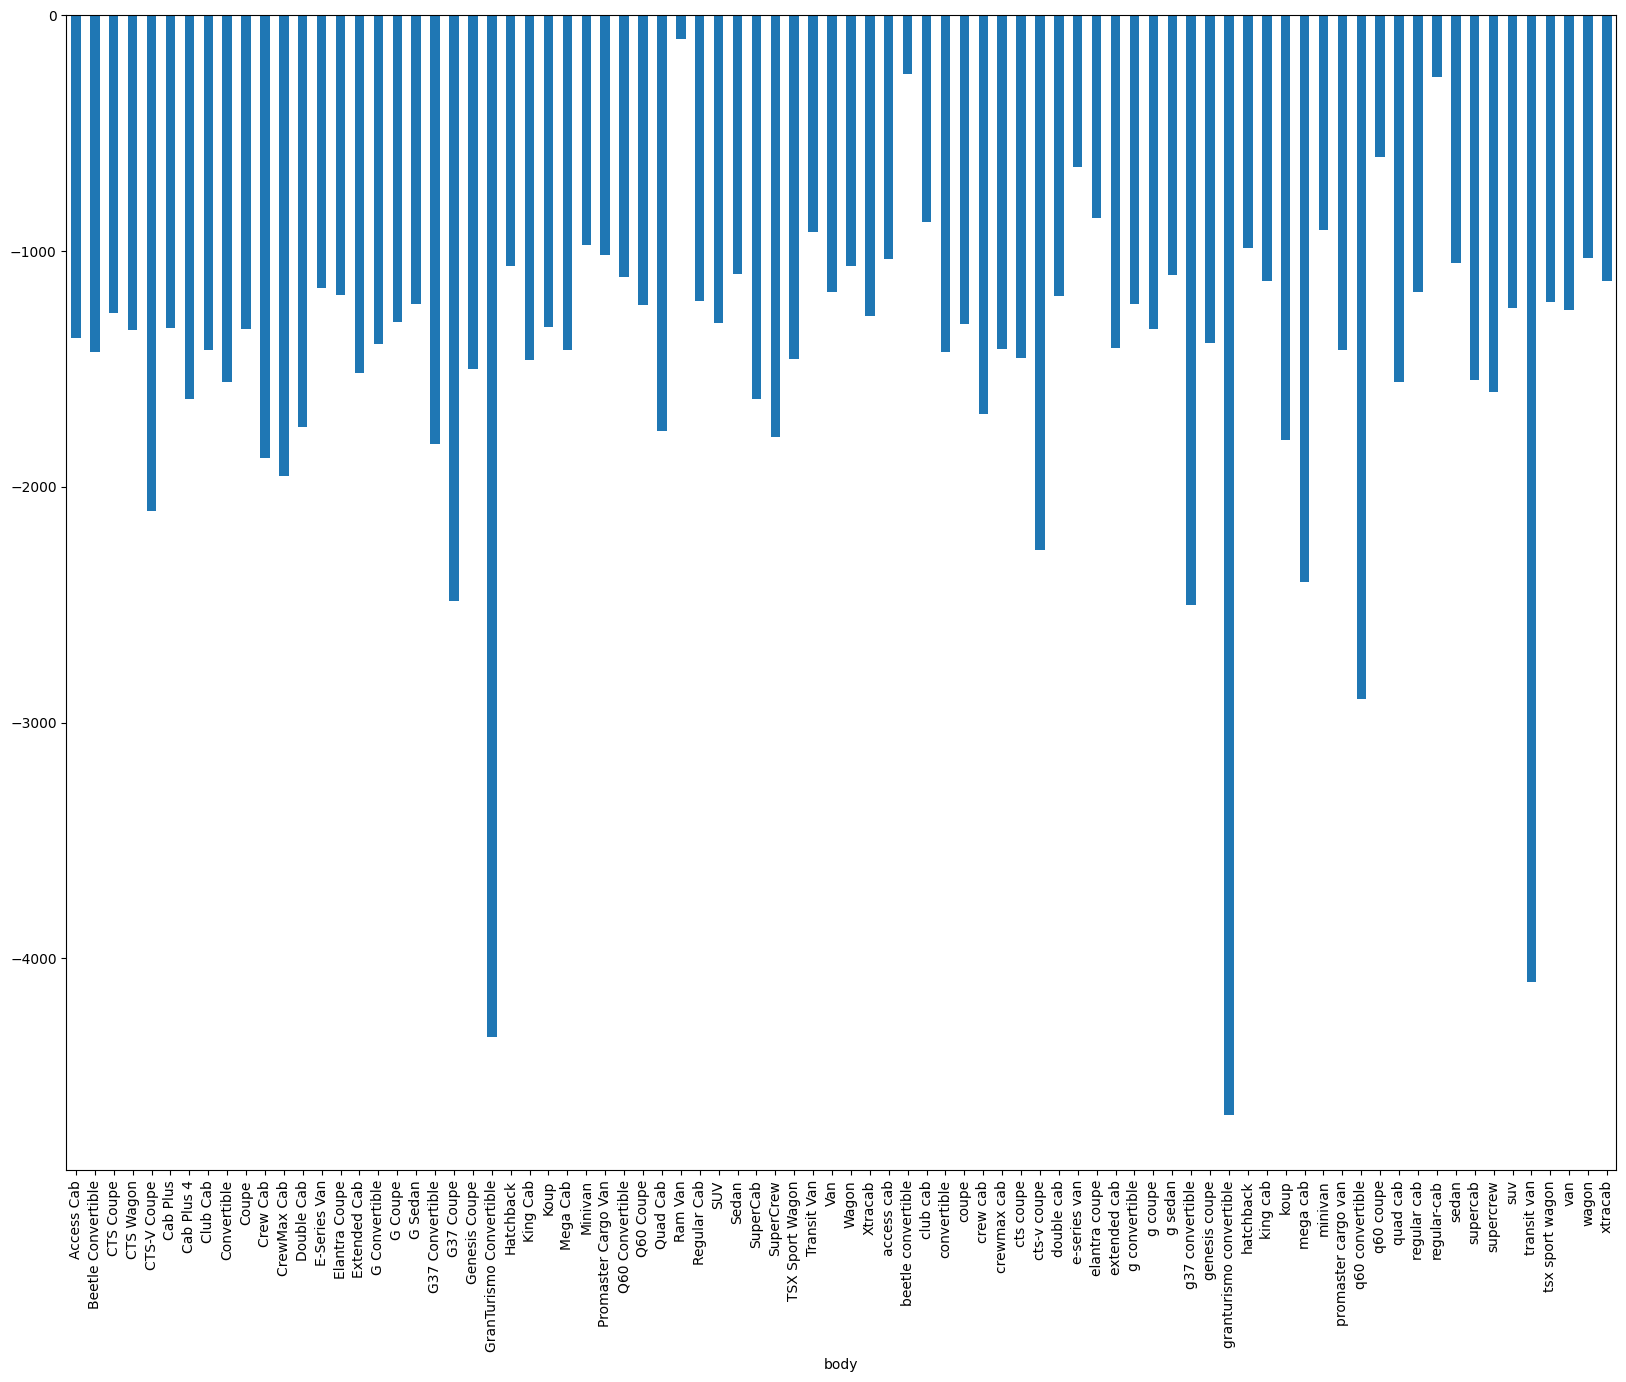

In [33]:
plt.figure (figsize=(20,15))
df.query('profit<0').groupby('body')['profit'].agg(['mean'])['mean'].plot(kind='bar')

Text(0, 0.5, 'sellingprice')

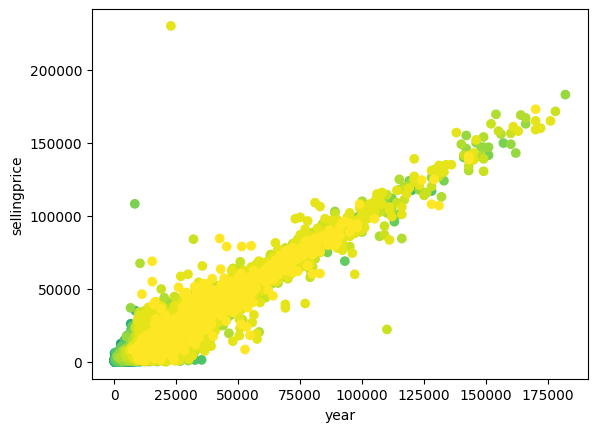

In [34]:
plt.scatter(df['mmr'],df['sellingprice'],c=df['year'])
plt.xlabel('year')
plt.ylabel('sellingprice')

Text(0, 0.5, 'sellingprice')

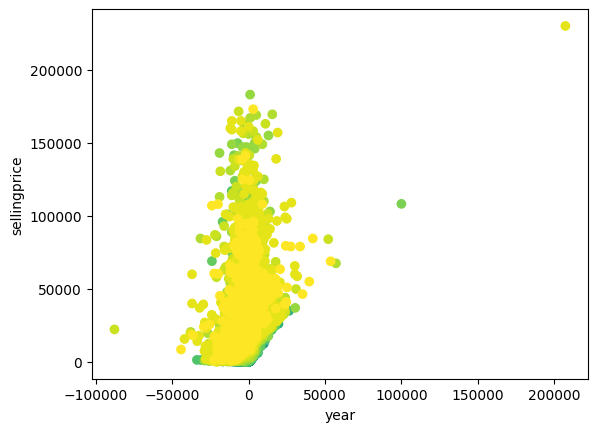

In [35]:
plt.scatter(df['profit'],df['sellingprice'],c=df['year'])
plt.xlabel('year')
plt.ylabel('sellingprice')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='color', ylabel='Count'>

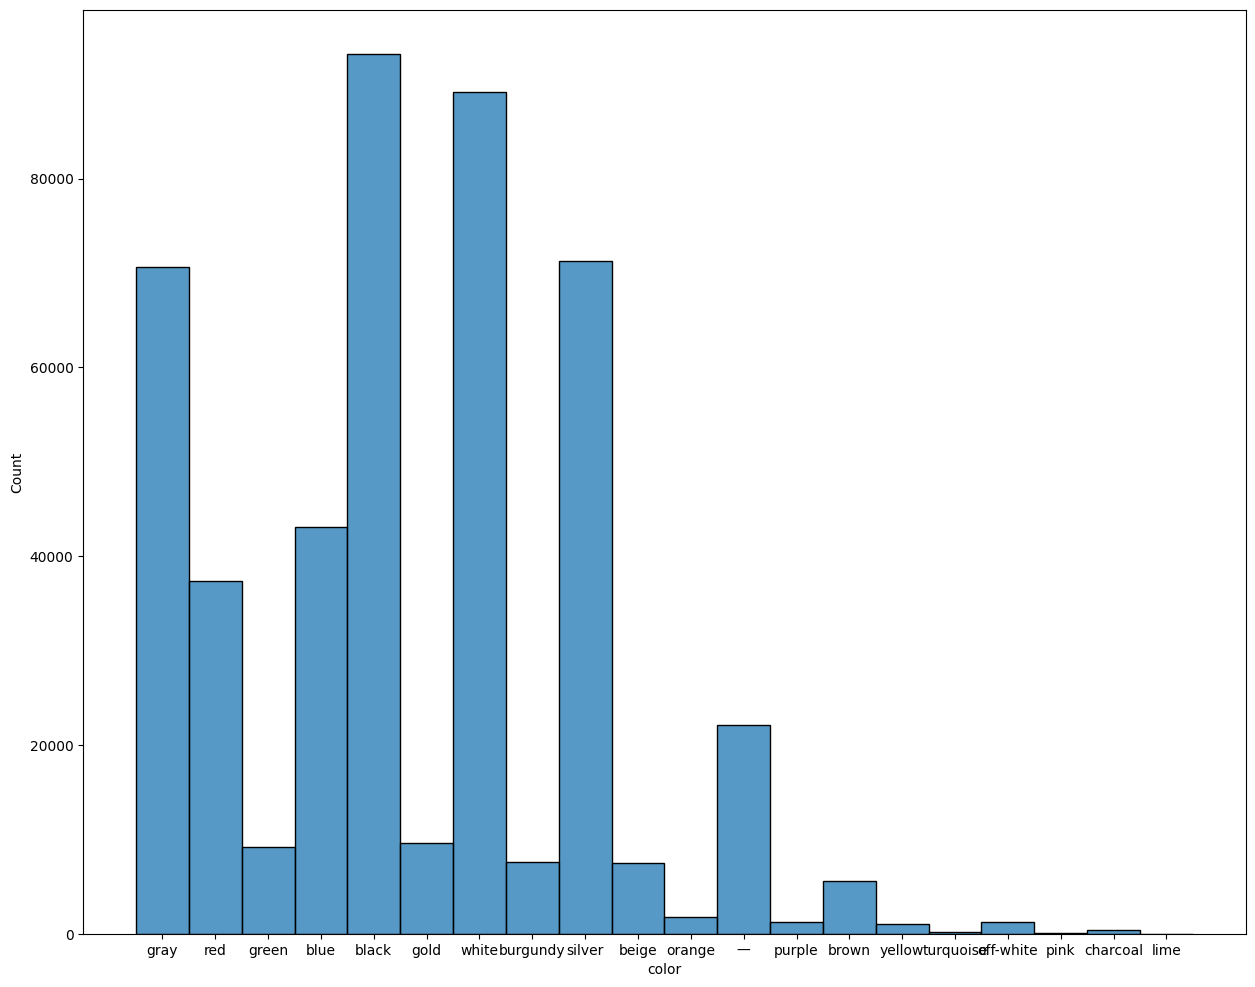

In [36]:
plt.figure(figsize=(15,12))
sns.histplot(df['color'])